<a href="https://colab.research.google.com/github/ebyau/Cats_vs_dogs-prediction/blob/master/introductory_nueral_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import torch
import helper
import matplotlib.pyplot as plt

In [2]:
from torchvision import datasets, transforms
# define to normalize data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5),(0.5,)),
                                ])
#download and the MNIST training dataset
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True,
                          train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64,
                                          shuffle=True)

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


The images are basically a tensor with a size (64,1,28,28). 
64 images per batch, 1 color channel,
28x28 pixels per image

In [0]:
for image, label in trainloader:
  dataiter =  iter(trainloader)
  images,labels = dataiter.next()
  print(type(images))
  print(images.shape)
  print(labels.shape)

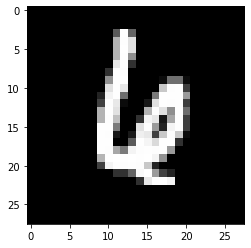

In [4]:
plt.imshow(images[1].numpy().squeeze(),cmap='Greys_r');

In [8]:
# sigmoid activation function
def activation(x):
  return 1/(1+torch.exp(-x))

# flatten input images
inputs = images.view(images.shape[0],-1)

#parameters
w1 = torch.randn(784,256)
b1 = torch.randn(256)

w2 = torch.randn(256,10)
b2 = torch.randn(10)
 
h = activation(torch.mm(inputs,w1)+b1)
out = torch.mm(h,w2) +b2
print(out.size())

torch.Size([64, 10])


In [9]:
def softmax(x):
  return torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1)

probabilities = softmax(out)
print(probabilities.shape)
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [0]:
from torch import nn
class Network(nn.Module):
  def __init__(self):
    super().__init__()

    # layers
    self.hidden = nn.Linear(784,256)
    self.output = nn.Linear(256,10)

    # activation fnctions
    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim=1)

  def forward(self,x):
    x = self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    x = self.softmax(x)

    return x

In [16]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [0]:
import torch.nn.functional as F

class Network(nn.Module):
  def __init__(self):
    super().__init__()

    self.hidden = nn.Linear(784,256)
    self.ouput = nn.Linear(256,10)

    def forward(x,self):
      x = F.sigmoid(self.hidden(x))
      x = F.softmax(self.output(x),dim=1)

      return x

  

In [18]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784,128)
    self.fc2 = nn.Linear(128,64)
    self.fc3 = nn.Linear(64,10)

    def forward(x,self):
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = F.relu(self.fc3(x),dim=1)

      return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [19]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[-0.0016, -0.0148,  0.0226,  ...,  0.0324, -0.0107,  0.0050],
        [ 0.0070,  0.0095, -0.0097,  ...,  0.0059, -0.0129,  0.0198],
        [-0.0093, -0.0139, -0.0348,  ..., -0.0195,  0.0151,  0.0084],
        ...,
        [ 0.0331, -0.0171,  0.0067,  ...,  0.0325, -0.0273,  0.0315],
        [-0.0185, -0.0069,  0.0229,  ...,  0.0206,  0.0185,  0.0026],
        [-0.0087, -0.0232,  0.0307,  ..., -0.0309, -0.0069,  0.0204]],
       requires_grad=True)
Parameter containing:
tensor([-1.4862e-02, -1.8874e-02,  1.2039e-02, -2.6492e-02,  1.4170e-02,
        -2.0371e-02, -2.2758e-02,  4.8493e-03,  2.4737e-03, -8.7331e-03,
        -2.6015e-02,  1.6186e-02, -2.5563e-02, -1.8126e-02,  1.3234e-02,
        -1.6387e-02,  2.9922e-03, -3.3965e-02, -2.3457e-02,  3.2151e-02,
         2.5297e-02,  1.7924e-02, -1.9476e-02,  2.4185e-02, -3.2675e-02,
         3.2769e-02,  1.8627e-02,  2.9133e-02,  1.4127e-02, -2.7440e-02,
        -2.2632e-02,  2.6362e-02,  2.4461e-03,  2.5619e-0